In [1]:
import pandas as pd
import pickle
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
import logging
from time import time
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import numpy as np
import os
import re
import csv
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from gensim.models import Word2Vec
import multiprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
import ruptures as rpt
import matplotlib.pyplot as plt
from math import sqrt
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import itertools
from collections import defaultdict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.gofplots import qqplot

In [2]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final arima data.pkl", "rb") as f:
    all_data = pickle.load(f)

In [2]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final arima data.pkl", "rb") as f:
    all_data = pickle.load(f)

In [11]:
all_data

,date,muslim_neg_share,caa,riot,tablighi,ramzan,lockdown,lockdown_days,caa_share,riot_share,tablighi_share,covid_share,ramzan_share,delhi_riots,ramadan,scovid
0,2020-01-22,0.190402,0.787565,0.026477,0.001414,0.0000,0,0,0.117708,0.003356,0.000258,0.030976,0.000000,0,0,0.034846
1,2020-01-23,0.225343,0.689119,0.095723,0.000000,0.0000,0,0,0.105111,0.012381,0.000000,0.038725,0.000000,0,0,0.043045
2,2020-01-24,0.169439,0.632124,0.059063,0.000000,0.0000,0,0,0.098202,0.007781,0.000000,0.055809,0.000000,0,0,0.060908
3,2020-01-25,0.177839,0.419689,0.030550,0.000000,0.0250,0,0,0.082569,0.005097,0.000000,0.065579,0.000680,0,0,0.056515
4,2020-01-26,0.191657,0.442142,0.024440,0.001414,0.0250,0,0,0.092888,0.004354,0.000363,0.050073,0.000726,0,0,0.040117
5,2020-01-27,0.197055,1.000000,0.044807,0.001414,0.0625,0,0,0.170194,0.006467,0.000294,0.064080,0.001470,0,0,0.063543
6,2020-01-28,0.169652,0.678756,0.073320,0.001414,0.0000,0,0,0.106274,0.009735,0.000270,0.077339,0.000000,0,0,0.083455
7,2020-01-29,0.123106,0.715026,0.059063,0.000000,0.0000,0,0,0.108519,0.007602,0.000000,0.082307,0.000000,0,0,0.091947
8,2020-01-30,0.232960,0.685665,0.038697,0.000000,0.0000,0,0,0.104639,0.005008,0.000000,0.079599,0.000000,0,0,0.088433
9,2020-01-31,0.212460,0.727116,0.036660,0.000000,0.0500,0,0,0.109096,0.004664,0.000000,0.076963,0.001037,0,0,0.086969


In [4]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_news_daily_details.pkl", "rb") as f:
    news = pickle.load(f)

In [7]:
news

,date,all_news,caa_news,riot_news,covid_news,tablighi_news,ramzan_news,scovid_news
0,2020-01-22,3874,456,13,120,1,0,119
1,2020-01-23,3796,399,47,147,0,0,147
2,2020-01-24,3727,366,29,208,0,0,208
3,2020-01-25,2943,243,15,193,0,2,193
4,2020-01-26,2756,256,12,138,1,2,137
5,2020-01-27,3402,579,22,218,1,5,217
6,2020-01-28,3698,393,36,286,1,0,285
7,2020-01-29,3815,414,29,314,0,0,314
8,2020-01-30,3794,397,19,302,0,0,302
9,2020-01-31,3859,421,18,297,0,4,297


In [6]:
news["scovid_news"] = news["covid_news"] - news["tablighi_news"]

In [8]:
def make_scovid(x):
    return x/news["scovid_news"].max()

In [9]:
scovid_dummy  = news["scovid_news"].apply(make_scovid)

In [10]:
all_data["scovid"] = scovid_dummy

In [12]:
all_data["datetime"] = pd.to_datetime(all_data["date"])
all_data.set_index(keys = "datetime", inplace = True)

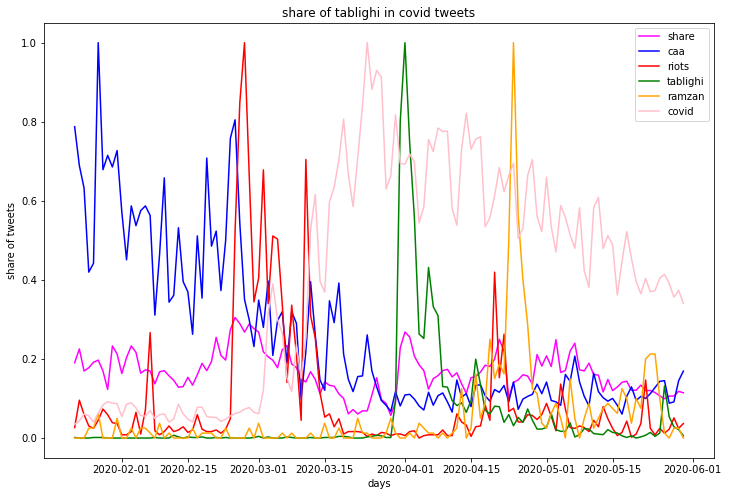

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(all_data["muslim_neg_share"], color = "magenta", label = "share")
ax.plot(all_data["caa"], color = "blue", label = "caa")
ax.plot(all_data["riot"], color = "red", label = "riots")
ax.plot(all_data["tablighi"], color = "green", label = "tablighi")
ax.plot(all_data["ramzan"], color = "orange", label = "ramzan")
ax.plot(all_data["scovid"], color = "pink", label = "covid")
ax.set(xlabel = "days", ylabel = "share of tweets", title = "share of tablighi in covid tweets")
ax.legend()

In [14]:
dummy_sum = all_data[["caa", "riot", "tablighi", "ramzan", "scovid"]].sum(axis = 1)

In [15]:
dummy_sum

datetime
2020-01-22    0.850302
2020-01-23    0.827888
2020-01-24    0.752095
2020-01-25    0.531754
2020-01-26    0.533113
2020-01-27    1.172264
2020-01-28    0.836946
2020-01-29    0.866036
2020-01-30    0.812795
2020-01-31    0.900745
2020-02-01    0.633995
2020-02-02    0.544722
2020-02-03    0.717532
2020-02-04    0.678734
2020-02-05    0.667121
2020-02-06    0.738847
2020-02-07    0.912035
2020-02-08    0.380113
2020-02-09    0.569392
2020-02-10    0.735232
2020-02-11    0.427156
2020-02-12    0.432356
2020-02-13    0.640652
2020-02-14    0.484930
2020-02-15    0.434419
2020-02-16    0.350005
2020-02-17    0.649595
2020-02-18    0.469682
2020-02-19    0.791376
2020-02-20    0.566529
2020-02-21    0.597220
2020-02-22    0.427151
2020-02-23    0.595392
2020-02-24    0.863013
2020-02-25    1.390044
2020-02-26    1.456885
2020-02-27    1.423225
2020-02-28    1.065048
2020-02-29    0.642051
2020-03-01    0.857117
2020-03-02    1.079523
2020-03-03    1.055268
2020-03-04    1.109934
20

<AxesSubplot:>

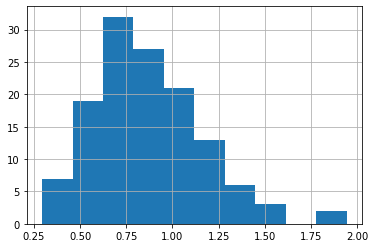

In [16]:
dummy_sum.hist()

In [17]:
df = pd.DataFrame()
df["scovid"] = all_data["scovid"].values
df["tablighi"] = all_data["tablighi"].values
df["riot"] = all_data["riot"].values
df["caa"] = all_data["caa"].values
df["lockdown"] = all_data["lockdown"].values
X = add_constant(df)

In [18]:
X

,const,scovid,tablighi,riot,caa,lockdown
0,1.0,0.034846,0.001414,0.026477,0.787565,0
1,1.0,0.043045,0.000000,0.095723,0.689119,0
2,1.0,0.060908,0.000000,0.059063,0.632124,0
3,1.0,0.056515,0.000000,0.030550,0.419689,0
4,1.0,0.040117,0.001414,0.024440,0.442142,0
5,1.0,0.063543,0.001414,0.044807,1.000000,0
6,1.0,0.083455,0.001414,0.073320,0.678756,0
7,1.0,0.091947,0.000000,0.059063,0.715026,0
8,1.0,0.088433,0.000000,0.038697,0.685665,0
9,1.0,0.086969,0.000000,0.036660,0.727116,0


In [19]:
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns)

const       21.832238
scovid       2.467083
tablighi     1.187346
riot         1.161188
caa          2.936289
lockdown     2.712948
dtype: float64

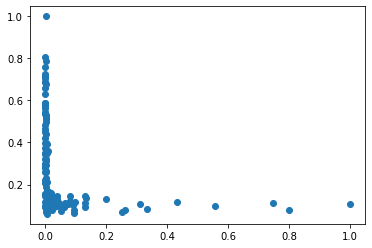

In [20]:
plt.scatter(df["tablighi"], df["caa"])

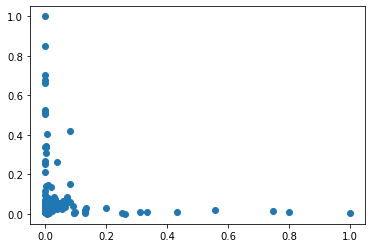

In [21]:
plt.scatter(df["tablighi"], df["riot"])

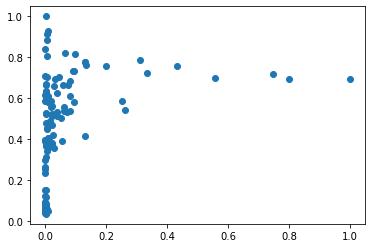

In [22]:
plt.scatter(df["tablighi"], df["scovid"])

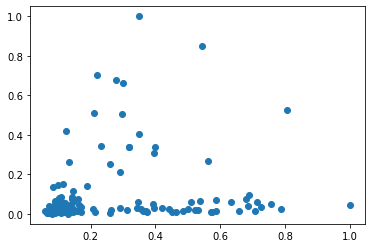

In [23]:
plt.scatter(df["caa"], df["riot"])

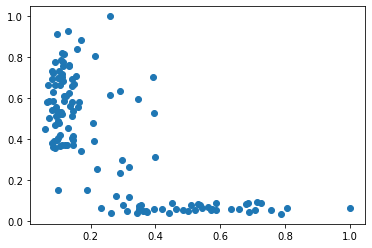

In [24]:
plt.scatter(df["caa"], df["scovid"])

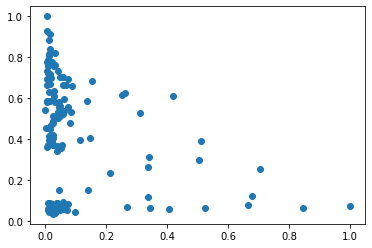

In [25]:
plt.scatter(df["riot"], df["scovid"])

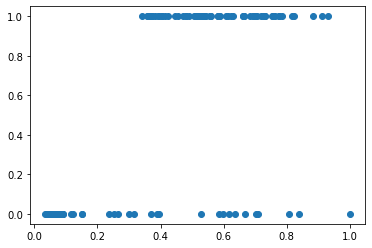

In [26]:
plt.scatter(df["scovid"], df["lockdown"])

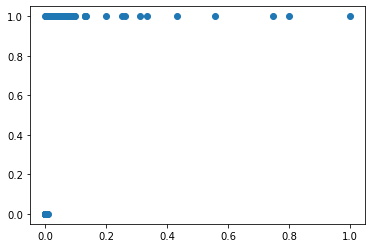

In [27]:
plt.scatter(df["tablighi"], df["lockdown"])

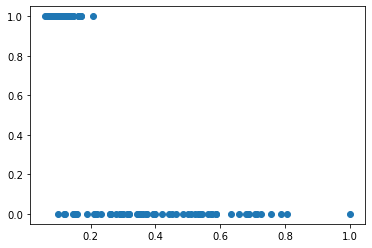

In [28]:
plt.scatter(df["caa"], df["lockdown"])

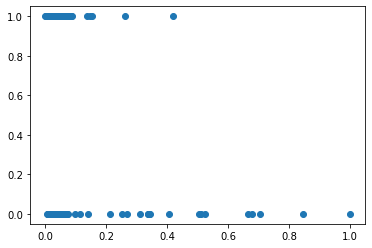

In [29]:
plt.scatter(df["riot"], df["lockdown"])

In [39]:
#we consider none of these variables to have egregious correlation. also they do not suffer from high multicollinearity

In [40]:
#removing the effects of caa, riot, tablighi, scovid, lockdown using simple regression

In [81]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 7), 'ct']
exog = np.column_stack([all_data["caa"], all_data["riot"], all_data["tablighi"], all_data["scovid"], all_data["lockdown"]])
model = SARIMAX(endog = all_data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.911371
         Iterations: 514
         Function evaluations: 748


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:                        SARIMAX   Log Likelihood                 248.478
Date:                Thu, 15 Sep 2022   AIC                           -480.957
Time:                        14:14:15   BIC                           -458.016
Sample:                             0   HQIC                          -471.635
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1472      0.021      7.105      0.000       0.107       0.188
drift         -0.0003      0.000     -1.248      0.212      -0.001       0.000
x1             0.0773      0.028      2.723      0.006       0.022       0.133
x2             0.1410      0.020      6.904      0.000       0.101       0.181
x3             0.1237      0.040      3.096      0.002       0.045       0.202
x4            -0.0763      0.028     -2.733      0.006      -0.131      -0.022
x5             0.0531      0.022      2.433      0.015       0.010       0.096
sigma2         0.0013      0.000      7.812      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                  26.25   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.00   Prob(JB):                         0.24
Heteroskedasticity (H):               1.25   Skew:                             0.35
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
#we reject Ljung-Box test for no serial correlation in the residuals, hence we cannot make decision about dropping
#drift parameter or not

In [43]:
#checking residuals for serial correlation and stationarity

In [82]:
resid = model_fit.resid

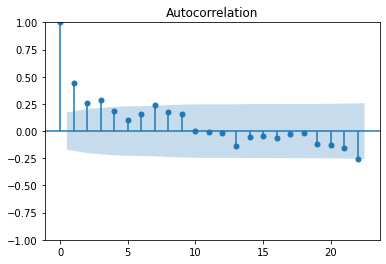

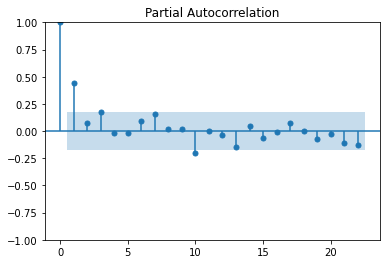

In [83]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

In [57]:
dftest = adfuller(resid, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -2.2297624714164073
2. P-value :  0.024763013541874424
3. num of lags :  6
4. num of observations used for ADF regression and critical value condition :  123
5. critical values : 
	 1% :  -2.5841569740233985
	 5% :  -1.9433893816162038
	 10% :  -1.6148264107751924
6. Reject Null of unit root


In [58]:
dftest = adfuller(resid, autolag = "AIC", regression = "c")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -2.365442123863397
2. P-value :  0.1517285542025707
3. num of lags :  6
4. num of observations used for ADF regression and critical value condition :  123
5. critical values : 
	 1% :  -3.4846672514209773
	 5% :  -2.8853397507076006
	 10% :  -2.5794629869786503
6. Cannot reject Null of unit root


In [59]:
dftest = adfuller(resid, autolag = "AIC", regression = "ct")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -2.422329526486008
2. P-value :  0.3678166295251706
3. num of lags :  6
4. num of observations used for ADF regression and critical value condition :  123
5. critical values : 
	 1% :  -4.034323572017774
	 5% :  -3.446805955734612
	 10% :  -3.1483426003846597
6. Cannot reject Null of unit root


In [60]:
kpss_test = kpss(resid, regression = "c")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [61]:
kpss_test = kpss(resid, regression = "ct")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


In [52]:
#d = 0 and trend = n, c, t, ct

In [53]:
def sarima_configs():
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["n", "c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = [0, 7]
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in p_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [64]:
cfg_list = sarima_configs()
t = time()
rel_models = []
exog = np.column_stack([all_data["caa"], all_data["riot"], all_data["tablighi"], all_data["lockdown"], all_data["scovid"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = all_data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            if trend == "n":
                p_values_list = model_fit.pvalues[5:][:-1]
                p_values = p_values_list
            elif trend == "c" or trend == "t":
                p_values_list = model_fit.pvalues[6:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[0])
            else:
                p_values_list = model_fit.pvalues[7:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.05 for p_val in p_values]
            if len(p_vals_mask) == sum(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]-404.025
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]-404.025
Model > [[(0, 0, 0), (0, 0, 1, 7), 'n']]-417.574
Model > [[(0, 0, 0), (0, 0, 2, 7), 'n']]-416.305
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]-422.748
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-461.082
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-461.082
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]-468.724
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]-466.667
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]-414.358
Model > [[(0, 0, 0), (0, 0, 0, 7), 't']]-414.358
Model > [[(0, 0, 0), (0, 0, 1, 7), 't']]-427.486
Model > [[(0, 0, 0), (1, 0, 0, 7), 't']]-427.764
Model > [[(0, 0, 0), (2, 0, 1, 7), 't']]-421.348
Model > [[(0, 0, 1), (0, 0, 0, 0), 'n']]-414.791
Model > [[(0, 0, 1), (0, 0, 0, 7), 'n']]-414.791
Model > [[(0, 0, 1), (0, 0, 1, 7), 'n']]-425.031
Model > [[(0, 0, 1), (0, 0, 3, 7), 'n']]-424.036
Model > [[(0, 0, 1), (1, 0, 0, 7), 'n']]-430.909
Model > [[(0, 0, 1), (1, 0, 1, 7), 'n']]-443.354
Model > [[(0, 0, 1),

In [65]:
rel_models.sort(key = lambda tup:tup[1])
rel_models

[([(2, 0, 3), (0, 0, 0, 0), 'c'], -509.4707367874945),
 ([(2, 0, 3), (0, 0, 0, 7), 'c'], -509.4707367874945),
 ([(1, 0, 0), (0, 0, 1, 7), 'c'], -507.2182628501318),
 ([(1, 0, 0), (1, 0, 1, 7), 'c'], -506.1706003370923),
 ([(1, 0, 0), (1, 0, 0, 7), 'c'], -505.6227834403323),
 ([(1, 0, 0), (0, 0, 0, 0), 'c'], -504.79627889944925),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], -504.79627889944925),
 ([(1, 0, 1), (0, 0, 0, 0), 'n'], -502.25961954357456),
 ([(1, 0, 1), (0, 0, 0, 7), 'n'], -502.25961954357456),
 ([(2, 0, 0), (0, 0, 0, 0), 'n'], -494.5709946467016),
 ([(2, 0, 0), (0, 0, 0, 7), 'n'], -494.5709946467016),
 ([(2, 0, 0), (1, 0, 1, 7), 'n'], -492.93127730072456),
 ([(0, 0, 3), (0, 0, 1, 7), 'c'], -492.5198646032513),
 ([(2, 0, 3), (0, 0, 1, 7), 'n'], -491.8329426317397),
 ([(1, 0, 0), (0, 0, 1, 7), 'n'], -491.26034323500687),
 ([(0, 0, 1), (0, 0, 1, 7), 'c'], -490.99679803205316),
 ([(0, 0, 3), (1, 0, 0, 7), 'c'], -490.78839219795265),
 ([(1, 0, 0), (1, 0, 1, 7), 'n'], -490.6524349245478),
 (

In [144]:
order, sorder, trend = [(1, 0, 0), (0, 0, 1, 7), 'c']
exog = np.column_stack([all_data["tablighi"], all_data["scovid"], all_data["caa"]])
model = SARIMAX(endog = all_data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -2.115570
         Iterations: 710
         Function evaluations: 1054


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  130
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 7)   Log Likelihood                 275.024
Date:                             Fri, 16 Sep 2022   AIC                           -536.048
Time:                                     22:50:48   BIC                           -515.975
Sample:                                          0   HQIC                          -527.892
                                             - 130                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0543      0.013      4.170      0.000       0.029       0.080
x1             0.1285      0.032      4.010      0.000       0.066       0.191
x2            -0.0675      0.029     -2.314      0.021      -0.125      -0.010
x3             0.0511      0.025      2.038      0.042       0.002       0.100
ar.L1          0.6834      0.063     10.922      0.000       0.561       0.806
ma.S.L7        0.2754      0.101      2.735      0.006       0.078       0.473
sigma2         0.0008      0.000      8.147      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.50   Prob(JB):                         0.34
Heteroskedasticity (H):               1.05   Skew:                             0.24
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

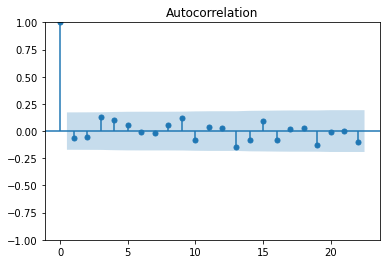

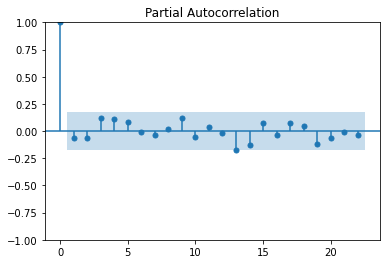

In [145]:
resid = model_fit.resid
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

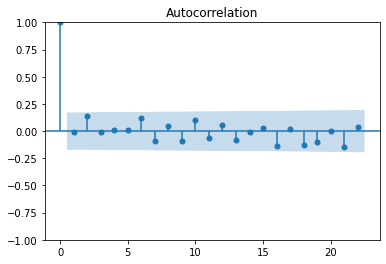

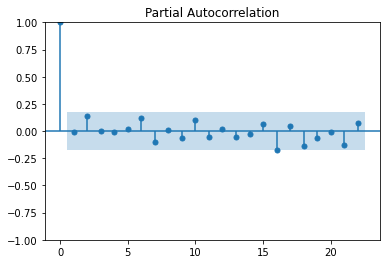

In [146]:
sqr_resid = np.square(resid)
acf_plot = plot_acf(sqr_resid)
pacf_plot = plot_pacf(sqr_resid, method = "ywm")

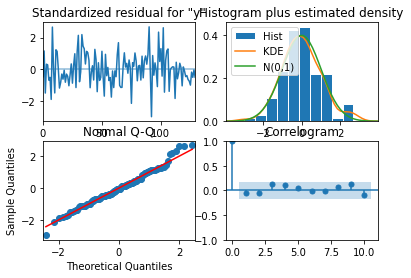

In [103]:
diagnostics = model_fit.plot_diagnostics()

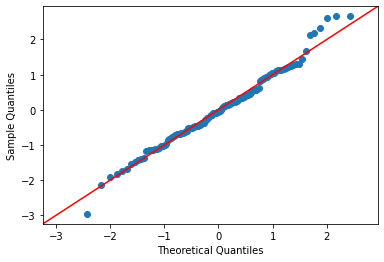

In [147]:
qq_plot = qqplot(resid, fit = True, line = "45")

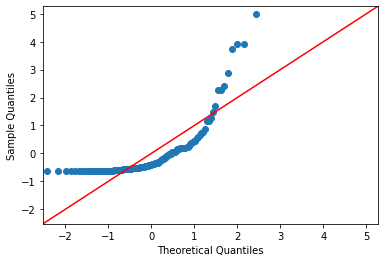

In [148]:
qq_plot = qqplot(sqr_resid, fit = True, line = "45")

In [105]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  130
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 7)   Log Likelihood                 275.024
Date:                             Fri, 16 Sep 2022   AIC                           -536.048
Time:                                     14:04:34   BIC                           -515.975
Sample:                                          0   HQIC                          -527.892
                                             - 130                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0543      0.013      4.170      0.000       0.029       0.080
x1             0.0511      0.025      2.038      0.042       0.002       0.100
x2             0.1285      0.032      4.010      0.000       0.066       0.191
x3            -0.0675      0.029     -2.314      0.021      -0.125      -0.010
ar.L1          0.6834      0.063     10.922      0.000       0.561       0.806
ma.S.L7        0.2754      0.101      2.735      0.006       0.078       0.473
sigma2         0.0008      0.000      8.147      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.50   Prob(JB):                         0.34
Heteroskedasticity (H):               1.05   Skew:                             0.24
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [293]:
#saving the model with exog = caa, tablighi and scovid

In [113]:
news["datetime"] = pd.to_datetime(news["date"])

In [114]:
news.set_index(keys = "datetime", inplace = True)

In [115]:
news

,date,all_news,caa_news,riot_news,covid_news,tablighi_news,ramzan_news,scovid_news
datetime,,,,,,,,
2020-01-22,2020-01-22,3874,456,13,120,1,0,119
2020-01-23,2020-01-23,3796,399,47,147,0,0,147
2020-01-24,2020-01-24,3727,366,29,208,0,0,208
2020-01-25,2020-01-25,2943,243,15,193,0,2,193
2020-01-26,2020-01-26,2756,256,12,138,1,2,137
2020-01-27,2020-01-27,3402,579,22,218,1,5,217
2020-01-28,2020-01-28,3698,393,36,286,1,0,285
2020-01-29,2020-01-29,3815,414,29,314,0,0,314
2020-01-30,2020-01-30,3794,397,19,302,0,0,302


In [116]:
scovid_share = news["scovid_news"]/news["all_news"]

In [117]:
all_data["scovid_share"] = scovid_share

In [118]:
all_data

,date,muslim_neg_share,caa,riot,tablighi,ramzan,lockdown,lockdown_days,caa_share,riot_share,tablighi_share,covid_share,ramzan_share,delhi_riots,ramadan,scovid,muslim_abusive,scovid_share
datetime,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,0.190402,0.787565,0.026477,0.001414,0.0000,0,0,0.117708,0.003356,0.000258,0.030976,0.000000,0,0,0.034846,0.220328,0.030718
2020-01-23,2020-01-23,0.225343,0.689119,0.095723,0.000000,0.0000,0,0,0.105111,0.012381,0.000000,0.038725,0.000000,0,0,0.043045,0.268112,0.038725
2020-01-24,2020-01-24,0.169439,0.632124,0.059063,0.000000,0.0000,0,0,0.098202,0.007781,0.000000,0.055809,0.000000,0,0,0.060908,0.215891,0.055809
2020-01-25,2020-01-25,0.177839,0.419689,0.030550,0.000000,0.0250,0,0,0.082569,0.005097,0.000000,0.065579,0.000680,0,0,0.056515,0.228148,0.065579
2020-01-26,2020-01-26,0.191657,0.442142,0.024440,0.001414,0.0250,0,0,0.092888,0.004354,0.000363,0.050073,0.000726,0,0,0.040117,0.207819,0.049710
2020-01-27,2020-01-27,0.197055,1.000000,0.044807,0.001414,0.0625,0,0,0.170194,0.006467,0.000294,0.064080,0.001470,0,0,0.063543,0.248395,0.063786
2020-01-28,2020-01-28,0.169652,0.678756,0.073320,0.001414,0.0000,0,0,0.106274,0.009735,0.000270,0.077339,0.000000,0,0,0.083455,0.234678,0.077069
2020-01-29,2020-01-29,0.123106,0.715026,0.059063,0.000000,0.0000,0,0,0.108519,0.007602,0.000000,0.082307,0.000000,0,0,0.091947,0.184312,0.082307
2020-01-30,2020-01-30,0.232960,0.685665,0.038697,0.000000,0.0000,0,0,0.104639,0.005008,0.000000,0.079599,0.000000,0,0,0.088433,0.300402,0.079599


In [110]:
other_data

,date,all_tweets,all_neg,muslim_convos,muslim_convo_neg,muslim_tweets,muslim_neg,covid_tweets,covid_neg,tablighi_tweets,...,tablighi_dummy,caa_dummy,riot_dummy,ramzan_dummy,election_dummy,muslim_convo_neg_share,muslim_tweets_neg_share,neg_muslim_convo_share,neg_muslim_tweets_share,muslim_abusive
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,20704,1292,1066,298,700,246,143,9,1,...,0.000472,0.566756,0.040711,0.004295,0.156026,0.230650,0.190402,0.279550,0.351429,0.220328
2020-01-23,2020-01-23,24086,1531,2025,422,1606,345,190,11,6,...,0.002832,0.586115,0.089450,0.002147,0.193317,0.275637,0.225343,0.208395,0.214819,0.268112
2020-01-24,2020-01-24,23208,1623,1185,332,805,275,212,8,1,...,0.000472,0.552069,0.049312,0.008590,0.164976,0.204559,0.169439,0.280169,0.341615,0.215891
2020-01-25,2020-01-25,23429,1805,1376,414,823,321,251,15,3,...,0.001416,0.646862,0.061353,0.003579,0.197196,0.229363,0.177839,0.300872,0.390036,0.228148
2020-01-26,2020-01-26,29321,1774,1549,445,970,340,234,20,12,...,0.005663,0.699599,0.124427,0.000716,0.137828,0.250846,0.191657,0.287282,0.350515,0.207819
2020-01-27,2020-01-27,24212,1766,1438,445,944,348,258,17,12,...,0.005663,0.772363,0.068234,0.001432,0.184368,0.251982,0.197055,0.309458,0.368644,0.248395
2020-01-28,2020-01-28,24032,1898,1368,408,858,322,378,20,6,...,0.002832,0.626836,0.070528,0.002147,0.248210,0.214963,0.169652,0.298246,0.375291,0.234678
2020-01-29,2020-01-29,26264,2112,1309,359,753,260,413,19,15,...,0.007079,0.662216,0.051032,0.000716,0.193019,0.169981,0.123106,0.274255,0.345286,0.184312
2020-01-30,2020-01-30,25180,2142,1719,579,1202,499,498,44,8,...,0.003775,0.744993,0.071101,0.004295,0.188246,0.270308,0.232960,0.336824,0.415141,0.300402


In [294]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_arima_model.pkl", "wb") as f:
    pickle.dump(model_fit, f)

In [109]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\september_final_data.pkl", "wb") as f:
    pickle.dump(all_data, f)

In [111]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\september_hateful_data.pkl", "wb") as f:
    pickle.dump(other_data, f)

In [80]:
#this is the model we will keep

In [119]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 7), 'ct']
exog = np.column_stack([all_data["caa_share"], all_data["riot_share"], all_data["tablighi_share"], all_data["scovid_share"], all_data["lockdown"]])
model = SARIMAX(endog = all_data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.939088
         Iterations: 631
         Function evaluations: 931


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:                        SARIMAX   Log Likelihood                 252.081
Date:                Fri, 16 Sep 2022   AIC                           -488.163
Time:                        14:22:46   BIC                           -465.223
Sample:                             0   HQIC                          -478.842
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1494      0.028      5.293      0.000       0.094       0.205
drift         -0.0003      0.000     -1.122      0.262      -0.001       0.000
x1             0.4584      0.236      1.943      0.052      -0.004       0.921
x2             1.0814      0.158      6.841      0.000       0.772       1.391
x3             0.7149      0.215      3.320      0.001       0.293       1.137
x4            -0.0938      0.037     -2.548      0.011      -0.166      -0.022
x5             0.0544      0.022      2.444      0.015       0.011       0.098
sigma2         0.0012      0.000      7.639      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                  23.00   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.00   Prob(JB):                         0.18
Heteroskedasticity (H):               1.36   Skew:                             0.38
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
cfg_list = sarima_configs()
t = time()
rel_models = []
exog = np.column_stack([all_data["caa_share"], all_data["riot_share"], all_data["tablighi_share"], all_data["lockdown"], all_data["scovid_share"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = all_data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            if trend == "n":
                p_values_list = model_fit.pvalues[5:][:-1]
                p_values = p_values_list
            elif trend == "c" or trend == "t":
                p_values_list = model_fit.pvalues[6:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[0])
            else:
                p_values_list = model_fit.pvalues[7:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.05 for p_val in p_values]
            if len(p_vals_mask) == sum(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]-425.805
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]-425.805
Model > [[(0, 0, 0), (0, 0, 1, 7), 'n']]-429.814
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]-430.837
Model > [[(0, 0, 0), (2, 0, 1, 7), 'n']]-424.396
Model > [[(0, 0, 0), (2, 0, 2, 7), 'n']]-424.918
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-468.301
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-468.301
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]-472.608
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]-470.899
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]-431.056
Model > [[(0, 0, 0), (0, 0, 0, 7), 't']]-431.056
Model > [[(0, 0, 0), (0, 0, 1, 7), 't']]-437.466
Model > [[(0, 0, 0), (1, 0, 0, 7), 't']]-435.945
Model > [[(0, 0, 0), (2, 0, 1, 7), 't']]-430.310
Model > [[(0, 0, 1), (0, 0, 0, 0), 'n']]-429.403
Model > [[(0, 0, 1), (0, 0, 0, 7), 'n']]-429.403
Model > [[(0, 0, 1), (0, 0, 1, 7), 'n']]-434.002
Model > [[(0, 0, 1), (1, 0, 0, 7), 'n']]-435.511
Model > [[(0, 0, 1), (2, 0, 1, 7), 'n']]-426.368
Model > [[(0, 0, 1),

In [121]:
rel_models.sort(key = lambda tup: tup[1])
rel_models

[([(1, 0, 0), (0, 0, 1, 7), 'c'], -508.32259854396233),
 ([(1, 0, 0), (1, 0, 0, 7), 'c'], -507.0086614891797),
 ([(1, 0, 0), (0, 0, 0, 0), 'c'], -505.69266815140486),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], -505.69266815140486),
 ([(1, 0, 1), (0, 0, 0, 0), 'n'], -503.7668637033215),
 ([(1, 0, 1), (0, 0, 0, 7), 'n'], -503.7668637033215),
 ([(3, 0, 2), (0, 0, 1, 7), 'c'], -502.9717628771473),
 ([(3, 0, 2), (1, 0, 0, 7), 'c'], -500.6086329944883),
 ([(2, 0, 0), (0, 0, 1, 7), 'n'], -494.84969753822674),
 ([(1, 0, 1), (1, 0, 1, 7), 'n'], -494.84375734391426),
 ([(2, 0, 0), (0, 0, 0, 0), 'n'], -494.75072830082206),
 ([(2, 0, 0), (0, 0, 0, 7), 'n'], -494.75072830082206),
 ([(0, 0, 3), (0, 0, 1, 7), 'c'], -494.7401885930447),
 ([(0, 0, 1), (0, 0, 1, 7), 'c'], -493.856659280536),
 ([(2, 0, 0), (1, 0, 1, 7), 'n'], -493.5354387250122),
 ([(0, 0, 3), (1, 0, 0, 7), 'c'], -493.3561734758917),
 ([(0, 0, 1), (1, 0, 0, 7), 'c'], -492.4550079843953),
 ([(1, 0, 0), (0, 0, 1, 7), 'n'], -491.8255460596613),
 ([(

In [124]:
order, sorder, trend = [(1, 0, 0), (0, 0, 1, 7), 'c']
exog = np.column_stack([all_data["tablighi_share"], all_data["scovid_share"]])
model = SARIMAX(endog = all_data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -2.103668
         Iterations: 519
         Function evaluations: 790


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  130
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 7)   Log Likelihood                 273.477
Date:                             Fri, 16 Sep 2022   AIC                           -534.954
Time:                                     16:41:35   BIC                           -517.748
Sample:                                          0   HQIC                          -527.963
                                             - 130                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0655      0.014      4.538      0.000       0.037       0.094
x1             0.7608      0.226      3.361      0.001       0.317       1.205
x2            -0.1107      0.036     -3.066      0.002      -0.181      -0.040
ar.L1          0.6671      0.063     10.570      0.000       0.543       0.791
ma.S.L7        0.2609      0.100      2.598      0.009       0.064       0.458
sigma2         0.0009      0.000      8.224      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 3.07
Prob(Q):                              0.56   Prob(JB):                         0.22
Heteroskedasticity (H):               1.03   Skew:                             0.27
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
#checking with hateful data

In [48]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\national_muslim_abuse_details.pkl", "rb") as f:
    hateful_data = pickle.load(f)

In [49]:
hateful_data.columns

Index(['date', 'all_abusive', 'muslim_abusive', 'muslim_abuse_share'], dtype='object')

In [50]:
hateful_data

,date,all_abusive,muslim_abusive,muslim_abuse_share
datetime,,,,
2020-01-22,2020-01-22,1584,349,0.220328
2020-01-23,2020-01-23,1891,507,0.268112
2020-01-24,2020-01-24,1913,413,0.215891
2020-01-25,2020-01-25,2025,462,0.228148
2020-01-26,2020-01-26,2430,505,0.207819
2020-01-27,2020-01-27,2025,503,0.248395
2020-01-28,2020-01-28,1909,448,0.234678
2020-01-29,2020-01-29,2078,383,0.184312
2020-01-30,2020-01-30,2237,672,0.300402


In [51]:
all_data["muslim_abusive"] = hateful_data["muslim_abuse_share"]

In [52]:
all_data

,date,muslim_neg_share,caa,riot,tablighi,ramzan,lockdown,lockdown_days,caa_share,riot_share,tablighi_share,covid_share,ramzan_share,delhi_riots,ramadan,scovid,muslim_abusive
datetime,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,0.190402,0.787565,0.026477,0.001414,0.0000,0,0,0.117708,0.003356,0.000258,0.030976,0.000000,0,0,0.034846,0.220328
2020-01-23,2020-01-23,0.225343,0.689119,0.095723,0.000000,0.0000,0,0,0.105111,0.012381,0.000000,0.038725,0.000000,0,0,0.043045,0.268112
2020-01-24,2020-01-24,0.169439,0.632124,0.059063,0.000000,0.0000,0,0,0.098202,0.007781,0.000000,0.055809,0.000000,0,0,0.060908,0.215891
2020-01-25,2020-01-25,0.177839,0.419689,0.030550,0.000000,0.0250,0,0,0.082569,0.005097,0.000000,0.065579,0.000680,0,0,0.056515,0.228148
2020-01-26,2020-01-26,0.191657,0.442142,0.024440,0.001414,0.0250,0,0,0.092888,0.004354,0.000363,0.050073,0.000726,0,0,0.040117,0.207819
2020-01-27,2020-01-27,0.197055,1.000000,0.044807,0.001414,0.0625,0,0,0.170194,0.006467,0.000294,0.064080,0.001470,0,0,0.063543,0.248395
2020-01-28,2020-01-28,0.169652,0.678756,0.073320,0.001414,0.0000,0,0,0.106274,0.009735,0.000270,0.077339,0.000000,0,0,0.083455,0.234678
2020-01-29,2020-01-29,0.123106,0.715026,0.059063,0.000000,0.0000,0,0,0.108519,0.007602,0.000000,0.082307,0.000000,0,0,0.091947,0.184312
2020-01-30,2020-01-30,0.232960,0.685665,0.038697,0.000000,0.0000,0,0,0.104639,0.005008,0.000000,0.079599,0.000000,0,0,0.088433,0.300402


<AxesSubplot:xlabel='datetime'>

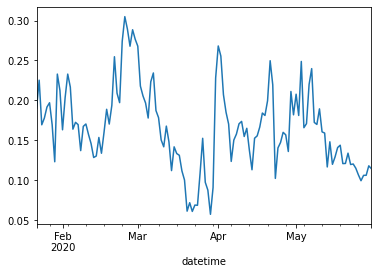

In [53]:
all_data["muslim_neg_share"].plot()

<AxesSubplot:xlabel='datetime'>

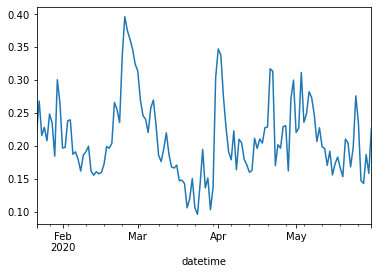

In [54]:
all_data["muslim_abusive"].plot()

In [197]:
#checking for hateful/abusive data

In [253]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 7), 'ct']
exog = np.column_stack([all_data["caa"], all_data["riot"], all_data["tablighi"], all_data["scovid"], all_data["ramzan"], all_data["lockdown"]])
model = SARIMAX(endog = all_data["muslim_abusive"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.802551
         Iterations: 758
         Function evaluations: 1089


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:                        SARIMAX   Log Likelihood                 234.332
Date:                Thu, 15 Sep 2022   AIC                           -450.663
Time:                        19:57:22   BIC                           -424.855
Sample:                             0   HQIC                          -440.177
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1531      0.023      6.520      0.000       0.107       0.199
drift       2.158e-05      0.000      0.076      0.939      -0.001       0.001
x1             0.1128      0.031      3.650      0.000       0.052       0.173
x2             0.1851      0.024      7.761      0.000       0.138       0.232
x3             0.1582      0.039      4.017      0.000       0.081       0.235
x4            -0.0768      0.035     -2.189      0.029      -0.145      -0.008
x5             0.0276      0.044      0.621      0.534      -0.059       0.115
x6             0.0598      0.030      2.017      0.044       0.002       0.118
sigma2         0.0016      0.000      7.392      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                  14.75   Jarque-Bera (JB):                 4.15
Prob(Q):                              0.00   Prob(JB):                         0.13
Heteroskedasticity (H):               1.44   Skew:                             0.43
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [254]:
resid = model_fit.resid

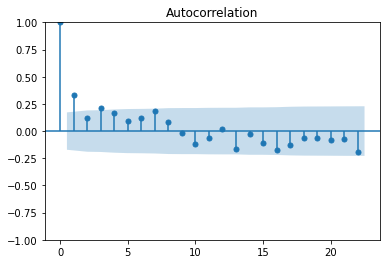

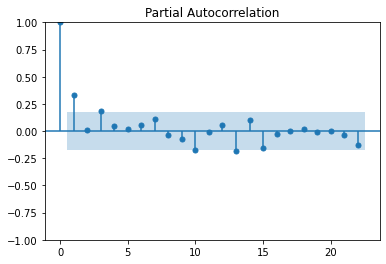

In [255]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

In [256]:
dftest = adfuller(resid, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -4.53792837075485
2. P-value :  8.03580484933172e-06
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -2.5835695988591976
	 5% :  -1.9433083482922873
	 10% :  -1.6148845473038977
6. Reject Null of unit root


In [257]:
dftest = adfuller(resid, autolag = "AIC", regression = "c")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -4.519571838237535
2. P-value :  0.00018123287044585727
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -3.482920063655088
	 5% :  -2.884580323367261
	 10% :  -2.5790575441750883
6. Reject Null of unit root


In [258]:
dftest = adfuller(resid, autolag = "AIC", regression = "ct")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -4.499804796285726
2. P-value :  0.0015106282680604375
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -4.031882284616695
	 5% :  -3.44564246299154
	 10% :  -3.147663331295954
6. Reject Null of unit root


In [259]:
kpss_test = kpss(resid, regression = "c")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [260]:
kpss_test = kpss(resid, regression = "ct")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [261]:
def sarima_configs():
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["n", "c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = [0, 7]
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in p_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [262]:
cfg_list = sarima_configs()
t = time()
rel_models = []
exog = np.column_stack([all_data["caa"], all_data["riot"], all_data["tablighi"], all_data["scovid"], all_data["ramzan"], all_data["lockdown"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = all_data["muslim_abusive"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            if trend == "n":
                p_values_list = model_fit.pvalues[6:][:-1]
                p_values = p_values_list
            elif trend == "c" or trend == "t":
                p_values_list = model_fit.pvalues[7:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[0])
            else:
                p_values_list = model_fit.pvalues[8:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.05 for p_val in p_values]
            if len(p_vals_mask) == sum(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]-366.497
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]-366.497
Model > [[(0, 0, 0), (0, 0, 1, 7), 'n']]-376.403
Model > [[(0, 0, 0), (0, 0, 2, 7), 'n']]-376.236
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]-383.417
Model > [[(0, 0, 0), (1, 0, 1, 7), 'n']]-388.038
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-429.550
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-429.550
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]-430.728
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]-430.345
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]-393.070
Model > [[(0, 0, 0), (0, 0, 0, 7), 't']]-393.070
Model > [[(0, 0, 0), (0, 0, 1, 7), 't']]-403.290
Model > [[(0, 0, 0), (1, 0, 0, 7), 't']]-403.877
Model > [[(0, 0, 0), (1, 0, 3, 7), 't']]-393.203
Model > [[(0, 0, 0), (2, 0, 1, 7), 't']]-396.430
Model > [[(0, 0, 1), (0, 0, 0, 0), 'n']]-370.210
Model > [[(0, 0, 1), (0, 0, 0, 7), 'n']]-370.210
Model > [[(0, 0, 1), (0, 0, 1, 7), 'n']]-377.636
Model > [[(0, 0, 1), (0, 0, 2, 7), 'n']]-377.233
Model > [[(0, 0, 1),

In [263]:
rel_models.sort(key = lambda tup: tup[1])
rel_models

[([(1, 0, 0), (0, 0, 0, 0), 'c'], -451.02105716603495),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], -451.02105716603495),
 ([(1, 0, 0), (1, 0, 0, 7), 'c'], -450.2908432286333),
 ([(1, 0, 0), (0, 0, 1, 7), 'c'], -449.97105965866547),
 ([(0, 0, 1), (0, 0, 0, 0), 'c'], -445.65677915895185),
 ([(0, 0, 1), (0, 0, 0, 7), 'c'], -445.65677915895185),
 ([(1, 0, 1), (0, 0, 0, 0), 'n'], -445.38049424687176),
 ([(1, 0, 1), (0, 0, 0, 7), 'n'], -445.38049424687176),
 ([(0, 0, 1), (1, 0, 0, 7), 'c'], -444.63590408851564),
 ([(0, 0, 1), (0, 0, 1, 7), 'c'], -444.5515953822519),
 ([(1, 0, 2), (0, 0, 0, 0), 'n'], -442.89406939080015),
 ([(1, 0, 2), (0, 0, 0, 7), 'n'], -442.89406939080015),
 ([(0, 0, 1), (1, 0, 2, 7), 't'], -434.2865648535262),
 ([(2, 0, 0), (0, 0, 0, 0), 'n'], -431.7330826612825),
 ([(2, 0, 0), (0, 0, 0, 7), 'n'], -431.7330826612825),
 ([(0, 0, 0), (0, 0, 1, 7), 'c'], -430.7282984935121),
 ([(0, 0, 0), (1, 0, 0, 7), 'c'], -430.34525811506677),
 ([(1, 0, 2), (2, 0, 2, 7), 'n'], -430.3235399622193),

In [90]:
order, sorder, trend = [(1, 0, 0), (0, 0, 0, 7), 'c']
exog = np.column_stack([all_data["riot"], all_data["tablighi"]])
model = SARIMAX(endog = all_data["muslim_abusive"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.845478
         Iterations: 233
         Function evaluations: 386


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 239.912
Date:                Fri, 16 Sep 2022   AIC                           -469.824
Time:                        13:59:01   BIC                           -455.487
Sample:                             0   HQIC                          -463.998
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0614      0.015      3.974      0.000       0.031       0.092
x1             0.0449      0.031      1.428      0.153      -0.017       0.107
x2             0.1325      0.037      3.583      0.000       0.060       0.205
ar.L1          0.6952      0.070      9.908      0.000       0.558       0.833
sigma2         0.0015      0.000      8.710      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 9.50
Prob(Q):                              0.63   Prob(JB):                         0.01
Heteroskedasticity (H):               1.59   Skew:                             0.47
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [267]:
resid = model_fit.resid

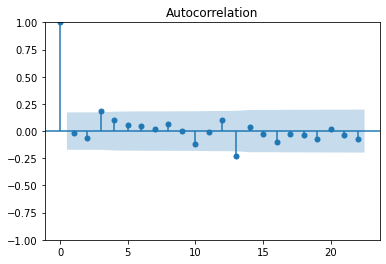

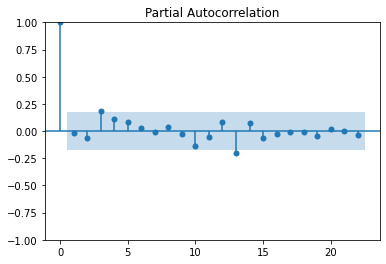

In [268]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

In [64]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\september_final_data.pkl", "rb") as f:
    other_data = pickle.load(f)

In [72]:
other_data

,date,all_tweets,all_neg,muslim_convos,muslim_convo_neg,muslim_tweets,muslim_neg,covid_tweets,covid_neg,tablighi_tweets,...,tablighi_dummy,caa_dummy,riot_dummy,ramzan_dummy,election_dummy,muslim_convo_neg_share,muslim_tweets_neg_share,neg_muslim_convo_share,neg_muslim_tweets_share,muslim_abusive
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,20704,1292,1066,298,700,246,143,9,1,...,0.000472,0.566756,0.040711,0.004295,0.156026,0.230650,0.190402,0.279550,0.351429,0.220328
2020-01-23,2020-01-23,24086,1531,2025,422,1606,345,190,11,6,...,0.002832,0.586115,0.089450,0.002147,0.193317,0.275637,0.225343,0.208395,0.214819,0.268112
2020-01-24,2020-01-24,23208,1623,1185,332,805,275,212,8,1,...,0.000472,0.552069,0.049312,0.008590,0.164976,0.204559,0.169439,0.280169,0.341615,0.215891
2020-01-25,2020-01-25,23429,1805,1376,414,823,321,251,15,3,...,0.001416,0.646862,0.061353,0.003579,0.197196,0.229363,0.177839,0.300872,0.390036,0.228148
2020-01-26,2020-01-26,29321,1774,1549,445,970,340,234,20,12,...,0.005663,0.699599,0.124427,0.000716,0.137828,0.250846,0.191657,0.287282,0.350515,0.207819
2020-01-27,2020-01-27,24212,1766,1438,445,944,348,258,17,12,...,0.005663,0.772363,0.068234,0.001432,0.184368,0.251982,0.197055,0.309458,0.368644,0.248395
2020-01-28,2020-01-28,24032,1898,1368,408,858,322,378,20,6,...,0.002832,0.626836,0.070528,0.002147,0.248210,0.214963,0.169652,0.298246,0.375291,0.234678
2020-01-29,2020-01-29,26264,2112,1309,359,753,260,413,19,15,...,0.007079,0.662216,0.051032,0.000716,0.193019,0.169981,0.123106,0.274255,0.345286,0.184312
2020-01-30,2020-01-30,25180,2142,1719,579,1202,499,498,44,8,...,0.003775,0.744993,0.071101,0.004295,0.188246,0.270308,0.232960,0.336824,0.415141,0.300402


In [73]:
other_data.columns

Index(['date', 'all_tweets', 'all_neg', 'muslim_convos', 'muslim_convo_neg',
       'muslim_tweets', 'muslim_neg', 'covid_tweets', 'covid_neg',
       'tablighi_tweets', 'tablighi_neg', 'caa_tweets', 'caa_neg',
       'riot_tweets', 'riot_neg', 'ramzan_tweets', 'ramzan_neg',
       'election_tweets', 'election_neg', 'covid_dummy', 'tablighi_dummy',
       'caa_dummy', 'riot_dummy', 'ramzan_dummy', 'election_dummy',
       'muslim_convo_neg_share', 'muslim_tweets_neg_share',
       'neg_muslim_convo_share', 'neg_muslim_tweets_share', 'muslim_abusive'],
      dtype='object')

In [68]:
other_data["datetime"] = pd.to_datetime(other_data["date"])

In [69]:
other_data.set_index(keys = "datetime", inplace = True)

In [71]:
other_data["muslim_abusive"] = hateful_data["muslim_abuse_share"]

In [74]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 7), 'ct']
exog = np.column_stack([other_data["caa_dummy"], other_data["riot_dummy"], other_data["tablighi_dummy"], other_data["covid_dummy"], other_data["ramzan_dummy"], other_data["election_dummy"]])
model = SARIMAX(endog = other_data["muslim_abusive"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.895505
         Iterations: 778
         Function evaluations: 1121


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:                        SARIMAX   Log Likelihood                 246.416
Date:                Fri, 16 Sep 2022   AIC                           -474.831
Time:                        11:35:20   BIC                           -449.024
Sample:                             0   HQIC                          -464.345
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1451      0.022      6.520      0.000       0.101       0.189
drift          0.0005      0.000      2.894      0.004       0.000       0.001
x1             0.1479      0.035      4.202      0.000       0.079       0.217
x2             0.1398      0.015      9.587      0.000       0.111       0.168
x3             0.1882      0.045      4.162      0.000       0.100       0.277
x4            -0.1311      0.024     -5.376      0.000      -0.179      -0.083
x5             0.0263      0.048      0.543      0.587      -0.068       0.121
x6            -0.0451      0.038     -1.176      0.239      -0.120       0.030
sigma2         0.0013      0.000      7.631      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                  13.81   Jarque-Bera (JB):                 7.47
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               2.75   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
resid = model_fit.resid

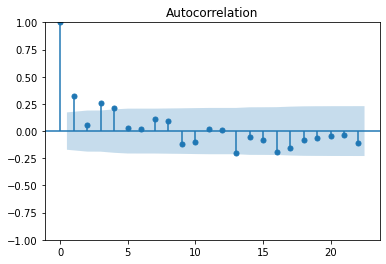

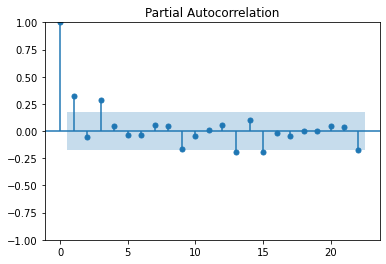

In [76]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

In [77]:
dftest = adfuller(resid, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -4.2619052929589
2. P-value :  2.552857479171874e-05
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -2.5835695988591976
	 5% :  -1.9433083482922873
	 10% :  -1.6148845473038977
6. Reject Null of unit root


In [78]:
dftest = adfuller(resid, autolag = "AIC", regression = "c")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -4.244064852342267
2. P-value :  0.0005544315824910179
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -3.482920063655088
	 5% :  -2.884580323367261
	 10% :  -2.5790575441750883
6. Reject Null of unit root


In [79]:
dftest = adfuller(resid, autolag = "AIC", regression = "ct")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -4.2244894348221695
2. P-value :  0.004110264918840532
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -4.031882284616695
	 5% :  -3.44564246299154
	 10% :  -3.147663331295954
6. Reject Null of unit root


In [80]:
kpss_test = kpss(resid, regression = "ct")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [81]:
kpss_test = kpss(resid, regression = "c")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [82]:
def sarima_configs():
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["n", "c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = [0, 7]
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in p_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [83]:
cfg_list = sarima_configs()
t = time()
rel_models = []
exog = np.column_stack([other_data["caa_dummy"], other_data["riot_dummy"], other_data["tablighi_dummy"], other_data["covid_dummy"], other_data["ramzan_dummy"], other_data["election_dummy"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = other_data["muslim_abusive"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            if trend == "n":
                p_values_list = model_fit.pvalues[6:][:-1]
                p_values = p_values_list
            elif trend == "c" or trend == "t":
                p_values_list = model_fit.pvalues[7:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[0])
            else:
                p_values_list = model_fit.pvalues[8:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.05 for p_val in p_values]
            if len(p_vals_mask) == sum(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]-287.393
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]-287.393
Model > [[(0, 0, 0), (0, 0, 1, 7), 'n']]-290.761
Model > [[(0, 0, 0), (0, 0, 2, 7), 'n']]-309.166
Model > [[(0, 0, 0), (0, 0, 3, 7), 'n']]-311.659
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]-369.704
Model > [[(0, 0, 0), (1, 0, 1, 7), 'n']]-397.100
Model > [[(0, 0, 0), (2, 0, 0, 7), 'n']]-381.120
Model > [[(0, 0, 0), (3, 0, 0, 7), 'n']]-385.553
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-442.644
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-442.644
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]-441.822
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]-441.651
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]-396.271
Model > [[(0, 0, 0), (0, 0, 0, 7), 't']]-396.271
Model > [[(0, 0, 0), (0, 0, 0, 0), 'ct']]-449.024
Model > [[(0, 0, 0), (0, 0, 0, 7), 'ct']]-449.024
Model > [[(0, 0, 1), (0, 0, 0, 0), 'n']]-339.782
Model > [[(0, 0, 1), (0, 0, 0, 7), 'n']]-339.782
Model > [[(0, 0, 1), (0, 0, 2, 7), 'n']]-355.042
Model > [[(0, 0, 1

In [84]:
rel_models.sort(key = lambda tup: tup[1])
rel_models

[([(0, 0, 1), (0, 0, 0, 0), 'ct'], -463.9684265842616),
 ([(0, 0, 1), (0, 0, 0, 7), 'ct'], -463.9684265842616),
 ([(1, 0, 0), (0, 0, 0, 0), 'ct'], -462.3145083276805),
 ([(1, 0, 0), (0, 0, 0, 7), 'ct'], -462.3145083276805),
 ([(1, 0, 0), (0, 0, 0, 0), 'c'], -462.02798651058464),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], -462.02798651058464),
 ([(0, 0, 1), (0, 0, 0, 0), 'c'], -461.0090253741332),
 ([(0, 0, 1), (0, 0, 0, 7), 'c'], -461.0090253741332),
 ([(1, 0, 3), (0, 0, 0, 0), 'n'], -460.9719470274369),
 ([(1, 0, 3), (0, 0, 0, 7), 'n'], -460.9719470274369),
 ([(1, 0, 0), (1, 0, 0, 7), 'c'], -460.38332546499504),
 ([(1, 0, 2), (0, 0, 0, 0), 'n'], -460.3622718298801),
 ([(1, 0, 2), (0, 0, 0, 7), 'n'], -460.3622718298801),
 ([(1, 0, 1), (0, 0, 0, 0), 'n'], -459.56467064833004),
 ([(1, 0, 1), (0, 0, 0, 7), 'n'], -459.56467064833004),
 ([(0, 0, 0), (0, 0, 0, 0), 'ct'], -449.023500593509),
 ([(0, 0, 0), (0, 0, 0, 7), 'ct'], -449.023500593509),
 ([(0, 0, 0), (0, 0, 0, 0), 'c'], -442.6437584204079),
 

In [107]:
order, sorder, trend = [(1, 0, 1), (0, 0, 0, 7), 'n']
exog = np.column_stack([other_data["caa_dummy"], other_data["riot_dummy"], other_data["tablighi_dummy"]])
model = SARIMAX(endog = other_data["muslim_abusive"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.929430
         Iterations: 407
         Function evaluations: 649


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 250.826
Date:                Fri, 16 Sep 2022   AIC                           -489.652
Time:                        14:06:20   BIC                           -472.447
Sample:                             0   HQIC                          -482.661
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1441      0.035      4.092      0.000       0.075       0.213
x2             0.0672      0.034      1.977      0.048       0.001       0.134
x3             0.2041      0.073      2.791      0.005       0.061       0.347
ar.L1          0.9960      0.009    113.703      0.000       0.979       1.013
ma.L1         -0.6000      0.068     -8.783      0.000      -0.734      -0.466
sigma2         0.0012      0.000      8.288      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):                11.80
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                             0.62
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""